In [1]:
# Import pandas sqlite3 matplotlib seaborn
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Kagglehub API and get data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("catherinerasgaitis/mxmh-survey-results")

print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/luckyc/.cache/kagglehub/datasets/catherinerasgaitis/mxmh-survey-results/versions/1


In [3]:
# Create a dataframe from CSV obtained in kagglehub API for survey results 
survey = pd.read_csv("mxmh_survey_results.csv")

# Show first two lines
survey.head(2)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.


In [4]:
# Create a dataframe for high popularity spotify
high_spotify = pd.read_csv("high_popularity_spotify_data.csv")

# Show first two lines
high_spotify.head(2)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.308,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.200,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


In [5]:
# Create a dataframe for low popularity spotify
low_spotify = pd.read_csv("low_popularity_spotify_data.csv")

# Show first two lines
low_spotify.head(2)

,time_signature,track_popularity,speechiness,danceability,playlist_name,track_artist,duration_ms,energy,playlist_genre,playlist_subgenre,...,track_album_id,playlist_id,track_id,valence,key,tempo,loudness,acousticness,liveness,track_album_name
0,4.0,23,0.0393,0.636,Rock Classics,Creedence Clearwater Revival,138053.0,0.746,rock,classic,...,4A8gFwqd9jTtnsNwUu3OQx,37i9dQZF1DWXRqgorJj26U,5e6x5YRnMJIKvYpZxLqdpH,0.432,0.0,132.310,-3.785,0.0648,0.1730,The Long Road Home - The Ultimate John Fogerty...
1,4.0,53,0.0317,0.572,Rock Classics,Van Halen,241600.0,0.835,rock,classic,...,2c965LEDRNrXXCeBOAAwns,37i9dQZF1DWXRqgorJj26U,5FqYA8KfiwsQvyBI4IamnY,0.795,0.0,129.981,-6.219,0.1710,0.0702,The Collection


In [6]:
# Review of column headers in survey data

survey.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [7]:
# Survey Column Header Clean up removing Word Frequency and square brackets from genre types

survey.columns = survey.columns.str.replace(r'Frequency\s*\[(.*?)\]', r'\1', regex=True)

survey.columns

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Classical', 'Country',
       'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi',
       'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music', 'Anxiety',
       'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions'],
      dtype='object')

In [8]:
# Selecting columns to drop
cols_to_drop= ['Timestamp', 
    'While working', 'Instrumentalist', 'Composer',
    'Exploratory', 'Foreign languages', 'Classical', 'Country',
    'EDM', 'Folk', 'Gospel', 'Hip hop', 'Jazz', 'K pop', 'Latin', 'Lofi',
     'Metal', 'Pop', 'R&B', 'Rap', 'Rock', 'Video game music', 'Permissions']

# Dropping Columns
# survey = survey.drop(columns= cols_to_drop)

In [9]:
# Renaming column BPM with tempo
survey = survey.rename(columns={'BPM': 'tempo'})

# Renaming column Fav genre with genre
survey = survey.rename(columns={'Fav genre': 'genre'})

# Lower case to column headers
survey.columns = survey.columns.str.lower()

# Applying lowercase to column genre
survey['genre'] = survey['genre'].str.lower()

# checking first 2 rows
survey.head(2)

,timestamp,age,primary streaming service,hours per day,while working,instrumentalist,composer,genre,exploratory,foreign languages,...,r&b,rap,rock,video game music,anxiety,depression,insomnia,ocd,music effects,permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.


In [10]:
# Filtering for Primary streaming service of spotify since other data is a spotify dataset

survey_filtered = survey[survey['primary streaming service']== 'Spotify']

survey_filtered.head(2)



,timestamp,age,primary streaming service,hours per day,while working,instrumentalist,composer,genre,exploratory,foreign languages,...,r&b,rap,rock,video game music,anxiety,depression,insomnia,ocd,music effects,permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.


In [11]:
survey.columns

Index(['timestamp', 'age', 'primary streaming service', 'hours per day',
       'while working', 'instrumentalist', 'composer', 'genre', 'exploratory',
       'foreign languages', 'tempo', 'classical', 'country', 'edm', 'folk',
       'gospel', 'hip hop', 'jazz', 'k pop', 'latin', 'lofi', 'metal', 'pop',
       'r&b', 'rap', 'rock', 'video game music', 'anxiety', 'depression',
       'insomnia', 'ocd', 'music effects', 'permissions'],
      dtype='object')

In [12]:
high_spotify.shape

(1686, 29)

In [13]:
low_spotify.shape

(3145, 29)

In [14]:
# Used exported csv from DBBrowser of unioned high popularity and low popularity. 
# With this union the duplicates were removed


unioned_spotify = pd.read_csv('Unioned_Popularity_Spotify.csv')

unioned_spotify.head()

,tempo,playlist_genre,track_artist,track_id,track_name,track_popularity
0,NaN,lofi,Berhanio,2teI76KKFE6qkpLZJs7tZ7,Make It,50
1,48.232,electronic,Peter Sandberg,7qt641kuazHzMIn4lbkns5,Deep,37
2,49.305,hip-hop,"The Alchemist, Boldy James",5467KZaTToEB680WvOd9w5,Ocean Prime (feat. Boldy James),68
3,50.827,pop,Forest Blakk,727Z2S2mtNH46CbP9EWPwY,If You Love Her,72
4,52.248,electronic,Sailsetter,06MlFhCl7jYNOlHgmNsooS,Northern,35


In [15]:
# shape of combined low and high popularity with duplicates removed

unioned_spotify.shape

(4676, 6)

In [16]:
# For illustrative purposes added the union all 
unioned_all_spotify = pd.read_csv('union_all_popularity_spotify.csv')

# This shape shows that all rows from low_popularity and high_popularity were combined
unioned_all_spotify.shape

(4831, 6)

In [17]:
# Checking data types
unioned_spotify.dtypes

tempo               float64
playlist_genre       object
track_artist         object
track_id             object
track_name           object
track_popularity      int64
dtype: object

In [18]:
# Renaming column playlist_genre with genre
unioned_spotify = unioned_spotify.rename(columns={'playlist_genre': 'genre'})



In [19]:
# Dropping rows with NaN value in tempo
unioned_spotify = unioned_spotify.dropna(subset=['tempo'])

# Converting tempo from float to int
unioned_spotify['tempo'] = unioned_spotify['tempo'].astype(float).round(1)

# Viewing first 2 rows
unioned_spotify.head(2)


,tempo,genre,track_artist,track_id,track_name,track_popularity
1,48.2,electronic,Peter Sandberg,7qt641kuazHzMIn4lbkns5,Deep,37
2,49.3,hip-hop,"The Alchemist, Boldy James",5467KZaTToEB680WvOd9w5,Ocean Prime (feat. Boldy James),68


In [20]:
# Checking columns to be used as shared column for uniqueness
unique_genres = survey_filtered['genre'].unique()

print(unique_genres)

['latin' 'video game music' 'r&b' 'jazz' 'k pop' 'rock' 'country'
 'hip hop' 'pop' 'rap' 'classical' 'metal' 'edm' 'folk' 'lofi' 'gospel']


In [21]:
# Checking columns to be used as shared column for uniqueness
unique_genres_spotify = unioned_spotify['genre'].unique()

print(unique_genres_spotify)

['electronic' 'hip-hop' 'pop' 'folk' 'lofi' 'classical' 'ambient' 'jazz'
 'wellness' 'arabic' 'soul' 'brazilian' 'blues' 'r&b' 'gaming' 'world'
 'afrobeats' 'latin' 'gospel' 'cantopop' 'country' 'metal' 'rock' 'reggae'
 'korean' 'indian' 'mandopop' 'indie' 'punk' 'j-pop' 'turkish' 'k-pop'
 'funk' 'disco' 'soca']


In [22]:
# Drop NaN in music effects
survey_filtered = survey_filtered.dropna(subset= ['music effects']).reset_index(drop=True)
survey_filtered.head()

,timestamp,age,primary streaming service,hours per day,while working,instrumentalist,composer,genre,exploratory,foreign languages,...,r&b,rap,rock,video game music,anxiety,depression,insomnia,ocd,music effects,permissions
0,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
1,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,r&b,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
2,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
3,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,k pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
4,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.


In [23]:
# Stacking the df vertically 
# combined = pd.concat([survey_filtered, unioned_spotify], ignore_index=True, sort=False)

# combined

In [24]:
# Setting up for correlation matrix
survey_filtered_numeric = survey_filtered.select_dtypes(include=['number'])
unioned_spotify_numeric = unioned_spotify.select_dtypes(include=['number'])

In [25]:
survey_filtered_numeric.head()

,age,hours per day,tempo,anxiety,depression,insomnia,ocd
0,18.0,4.0,132.0,7.0,7.0,10.0,2.0
1,18.0,4.0,107.0,7.0,2.0,5.0,9.0
2,18.0,5.0,86.0,8.0,8.0,7.0,7.0
3,21.0,1.0,95.0,5.0,3.0,5.0,3.0
4,19.0,6.0,94.0,2.0,0.0,0.0,0.0


In [26]:
unioned_spotify_numeric.head()

,tempo,track_popularity
1,48.2,37
2,49.3,68
3,50.8,72
4,52.2,35
5,52.9,50


In [27]:
# Correlation Matrix
correlations_matrix = pd.concat([survey_filtered_numeric, unioned_spotify_numeric], axis=1).corr()

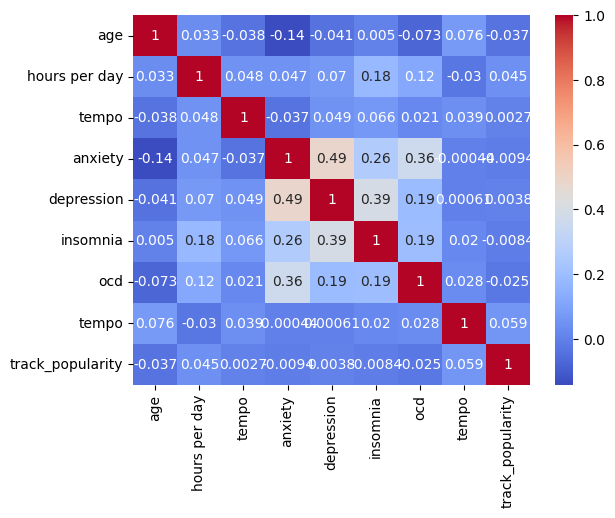

In [28]:
# Plot the heatmap  
sns.heatmap(correlations_matrix, annot=True, cmap='coolwarm')
plt.show()

In [29]:
corr_matrix_survey = survey_filtered_numeric.corr()

corr_matrix_survey.head()

,age,hours per day,tempo,anxiety,depression,insomnia,ocd
age,1.000000,0.033192,-0.038393,-0.141901,-0.040997,0.005029,-0.072939
hours per day,0.033192,1.000000,0.047530,0.046852,0.070398,0.182893,0.119583
tempo,-0.038393,0.047530,1.000000,-0.036867,0.049236,0.066455,0.021417
anxiety,-0.141901,0.046852,-0.036867,1.000000,0.486922,0.261002,0.363395
depression,-0.040997,0.070398,0.049236,0.486922,1.000000,0.394948,0.189184


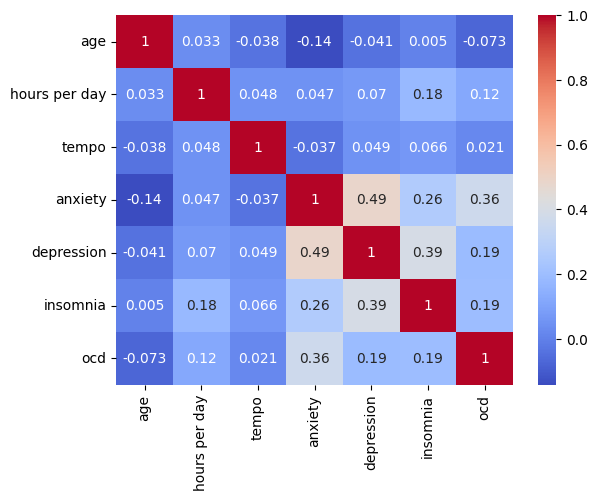

In [30]:
# Plot the heatmap  
sns.heatmap(corr_matrix_survey, annot=True, cmap='coolwarm')
plt.show()

In [31]:
corr_matrix_spotify = unioned_spotify_numeric.corr()

corr_matrix_spotify.head()

,tempo,track_popularity
tempo,1.000000,0.059178
track_popularity,0.059178,1.000000


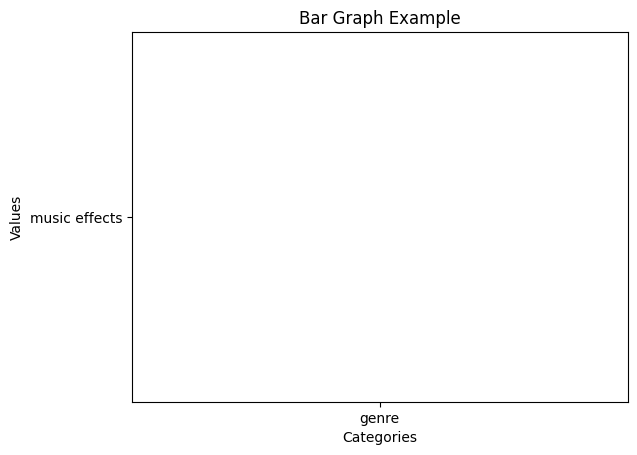

In [32]:
# Bar Graph

x_axis = ['genre']
y_axis = ['music effects']

plt.bar(x_axis, y_axis, color='skyblue', width=0.5)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph Example')
plt.show()

In [33]:
# SQlite counts grouped by genre and music effect
counts_genre_effect = pd.read_csv('Favgenre_Musiceffects.csv')

In [34]:
counts_genre_effect.head()

,Age,Favgenre,BPM,Anxiety,Depression,Insomnia,OCD,Musiceffects,COUNT (Musiceffects)
0,17.0,classical,120.0,6,6,8,2,Improve,39
1,19.0,classical,120.0,4,4,4,3,No effect,13
2,17.0,classical,135.0,7,9,2,8,Worsen,1
3,19.0,country,88.0,2,1,2,0,Improve,20
4,18.0,country,NaN,7,7,4,7,No effect,5


In [35]:
counts_filtered = counts_genre_effect.dropna(subset= ['Musiceffects']).reset_index(drop=True)
counts_filtered.head()

,Age,Favgenre,BPM,Anxiety,Depression,Insomnia,OCD,Musiceffects,COUNT (Musiceffects)
0,17.0,classical,120.0,6,6,8,2,Improve,39
1,19.0,classical,120.0,4,4,4,3,No effect,13
2,17.0,classical,135.0,7,9,2,8,Worsen,1
3,19.0,country,88.0,2,1,2,0,Improve,20
4,18.0,country,NaN,7,7,4,7,No effect,5


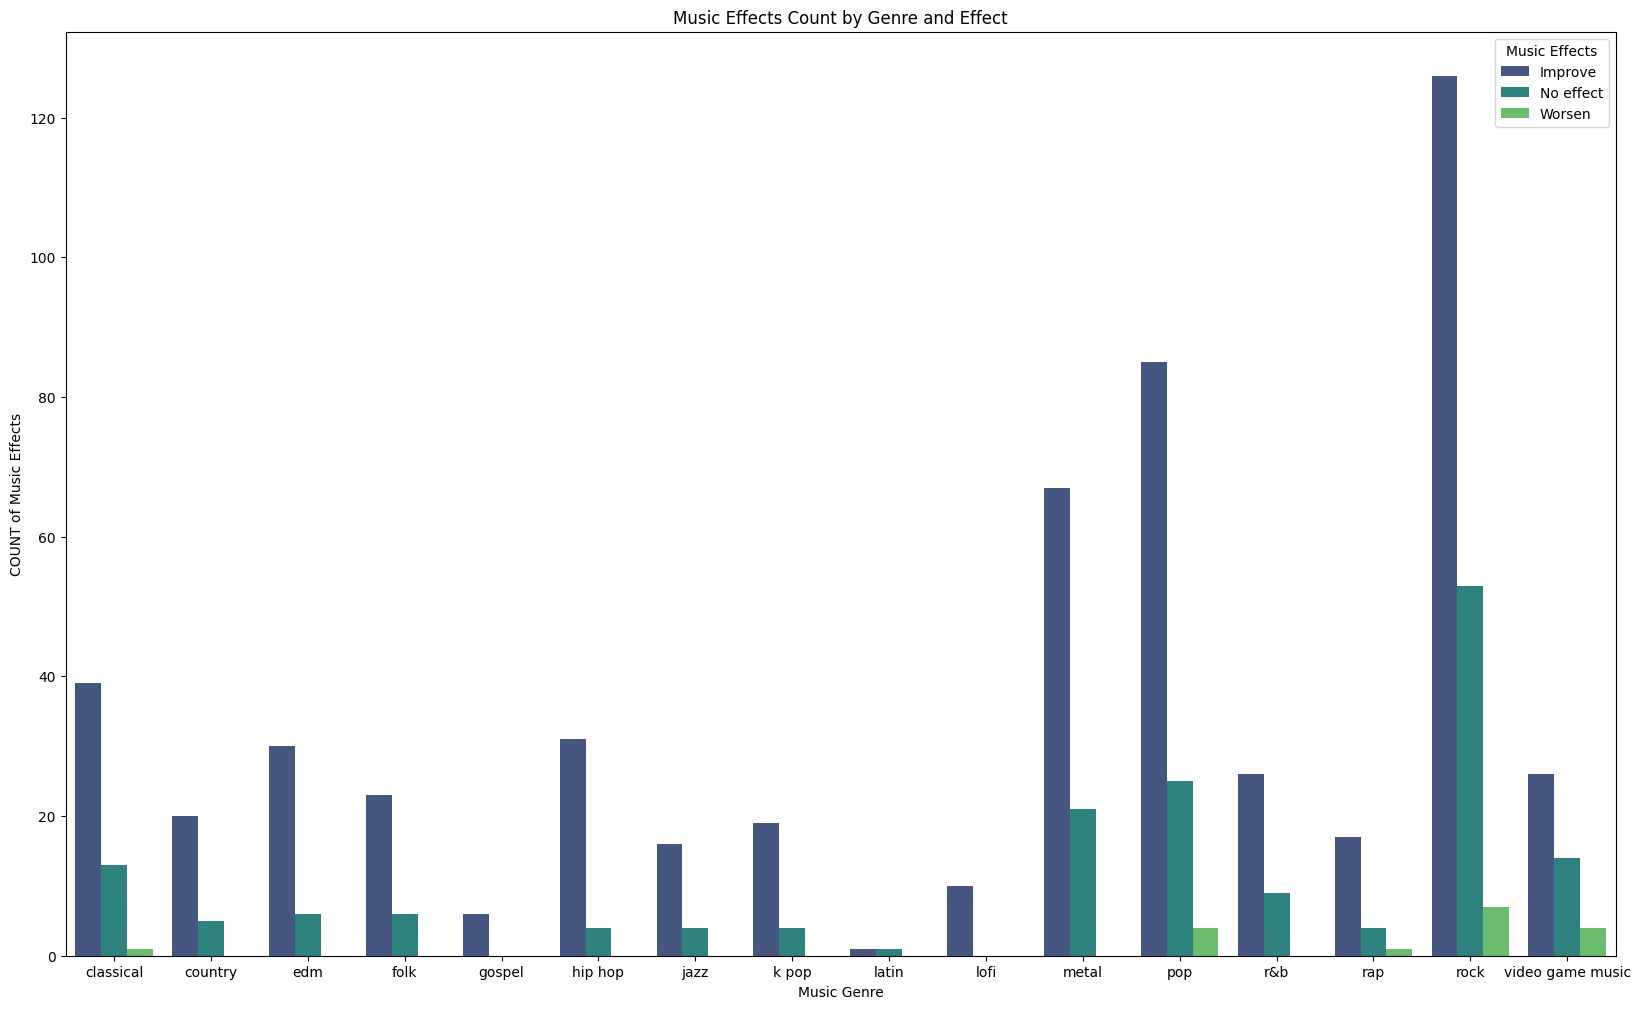

In [46]:
# Group by both Favgenre and Musiceffects and count the occurrences
grouped_data = counts_filtered.groupby(['Favgenre', 'Musiceffects'])['COUNT (Musiceffects)'].sum().reset_index()

# Create a bar plot to show the counts of each Musiceffects for each Favgenre
plt.figure(figsize=(20, 12))
sns.barplot(x='Favgenre', y='COUNT (Musiceffects)', hue='Musiceffects', data=grouped_data, palette='viridis')

# Adding titles and labels
plt.title('Music Effects Count by Genre and Effect')
plt.xlabel('Music Genre')
plt.ylabel('COUNT of Music Effects')
plt.legend(title='Music Effects')

# Show the plot
plt.show()